# Prédiction des maladies cardiaques

### Nous allons commencer par importer les bibliothèques.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

### Préparation et Traitement des données

Dans cette partie, nous allons préparer et traiter les données pour ensuite les visualiser et les utiliserpour construire nos modèles de machine learning

In [2]:
# Reading the data 
data = pd.read_csv('https://www.openml.org/data/get_csv/1592290/phpgNaXZe')

In [3]:
# Mise en place des colonnes
column = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age','chd']

In [4]:
data.columns = column

In [5]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [6]:
 data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


Description des informations sur les données statistiques

In [7]:
# Vérification des valeurs manquantes
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

Le tableau précédent détermine les tableaux brutes
 
 Nous n'avons pas de valeurs manquantes dans nos données et pour égaliser les valeurs des différents attributs,nous appliquons la mise à l'échelle des caractéristiques puis la mise à l'échelle Min-Max:

In [8]:
# Mise à l'échelle des caractéristiques, pour rendre les données catégorielles précises
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['famhist']=encoder.fit_transform(data['famhist'])
data['chd']=encoder.fit_transform(data['chd'])

In [9]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,100))

In [11]:
# réglage de l'échelle de la valeur max min pour sbp dans la plage de 0 à 100, normaliser
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))

In [12]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [13]:
# Données après modification
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,31.903282,3.635649,4.740325,25.406732,0.584416,53.103896,26.044113,17.044394,42.816017,0.346320
std,17.518220,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,0.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,19.658120,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,28.205128,2.000000,4.340000,26.115000,1.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,40.170940,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,100.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


La variation des valeurs à travers le DataFrame pour les 50 premières valeurs

## Visualisation des données

Après avoir comparé différents attributs entre eux, nous obtenons les résultats utiles suivants

<IPython.core.display.Javascript object>


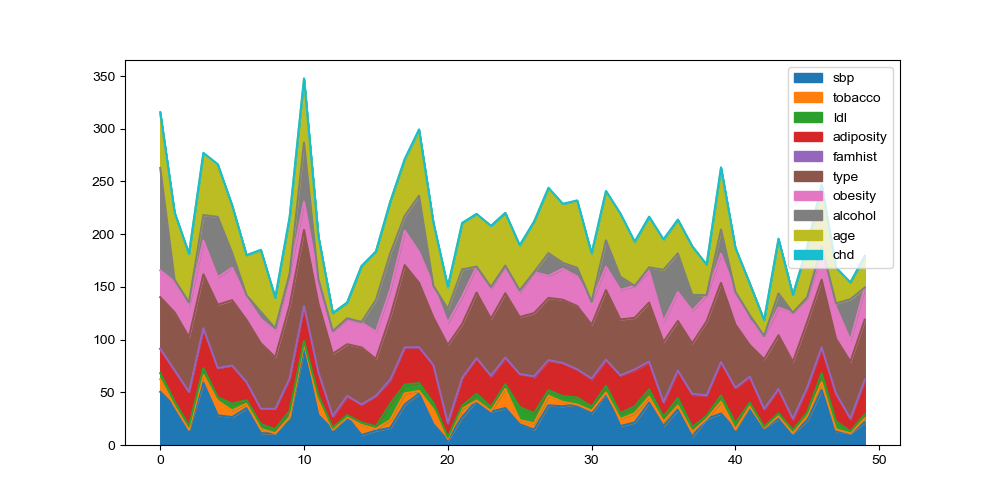

In [14]:
data.head(50).plot(kind='area',figsize=(10,5));

### Répartition de l'obésité selon l'âge

<IPython.core.display.Javascript object>


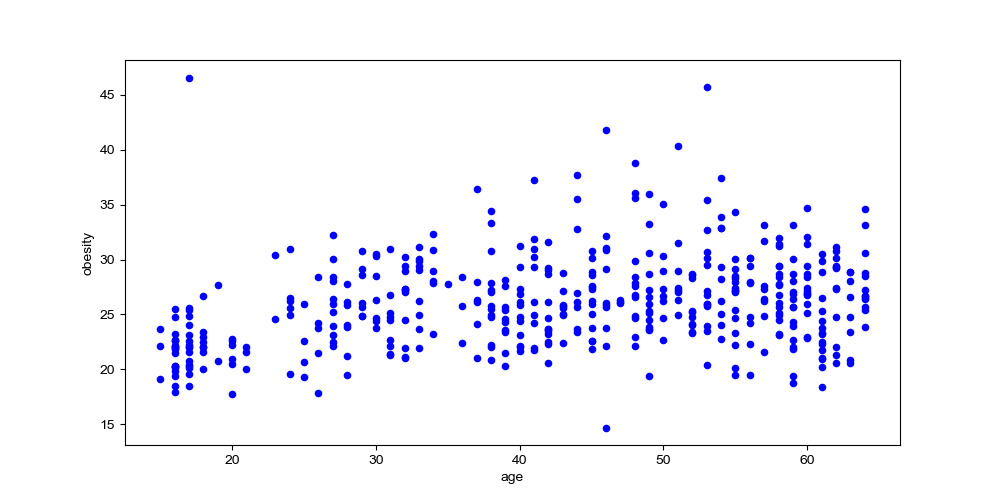

In [15]:
data.plot(x='age',y='obesity',kind='scatter',figsize =(10,5),c='blue');

Le graphique de dispersion ci-dessus (obéisité vs âge) nous donne quelques informations.
Nous pouvons notamment observer des clusters(groupes)principalement dans les groupes d'âge suivants:

Avant l'âge de 20 ans 
Après l'âge de 40 ans et surtout dans la cinquantaine

### Répartition de la consommation de tabac selon l'âge

<IPython.core.display.Javascript object>


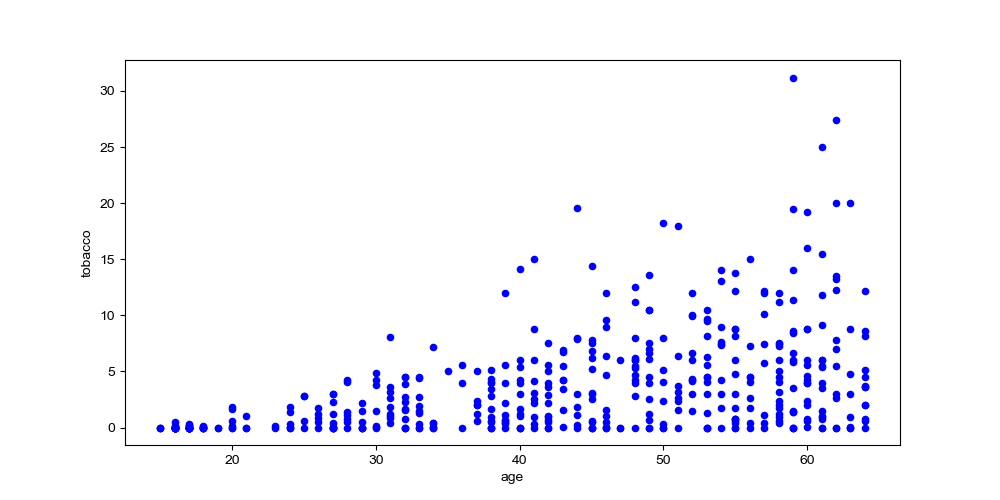

In [16]:
data.plot(x='age',y='tobacco',kind='scatter',figsize =(10,5),c='blue');

Dans le graphique de la consommation du tabac en fonction de l'âge, on peut voir que la consommation augmente après l'âge de 30 ans.

<IPython.core.display.Javascript object>


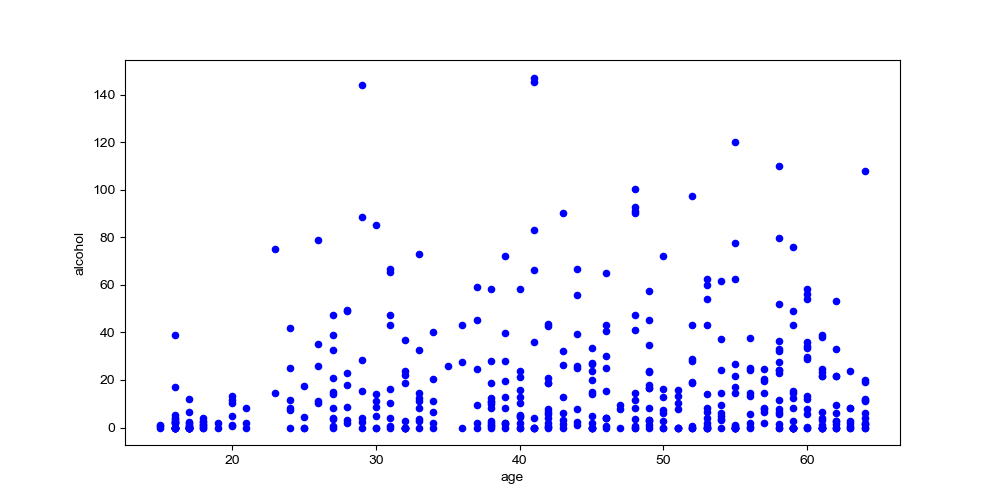

In [17]:
#Répartition de la consommation d'alcool selon l'âge
data.plot(x='age',y='alcohol',kind='scatter',figsize =(10,5),c='blue');

A partir du graphique de la consommation d'alcool en fonction de l'âge,on observe que la consommation maximale d'alcool commence juste après 25 ans.

### Histogramme de diverses fonctionnalités dans DataFrame

<IPython.core.display.Javascript object>


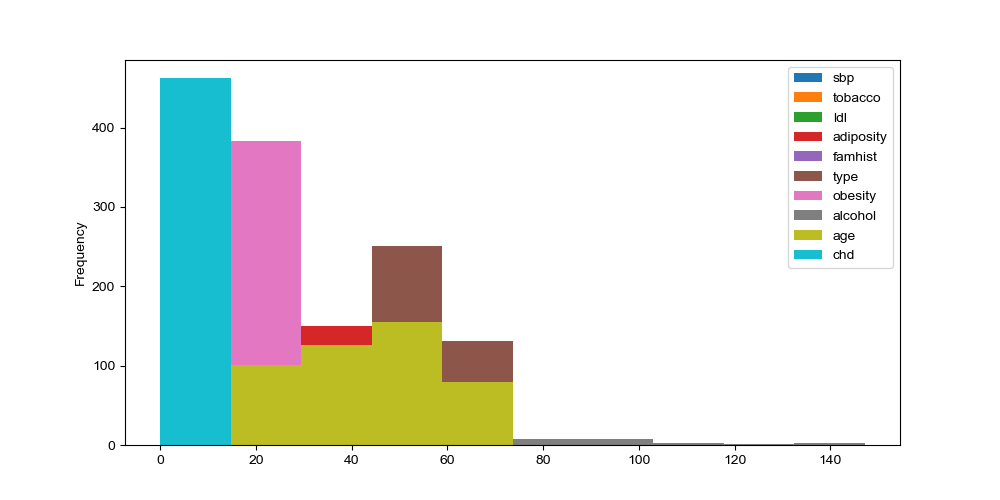

In [18]:
data.plot(kind = 'hist',figsize =(10,5));

Graphique en boîte des Fonctionnalités, représentant :

--Extrême supérieur

--Quartile supérieur

--Médian

--Quartile inférieure

--Extrême inférieur

In [19]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

<IPython.core.display.Javascript object>


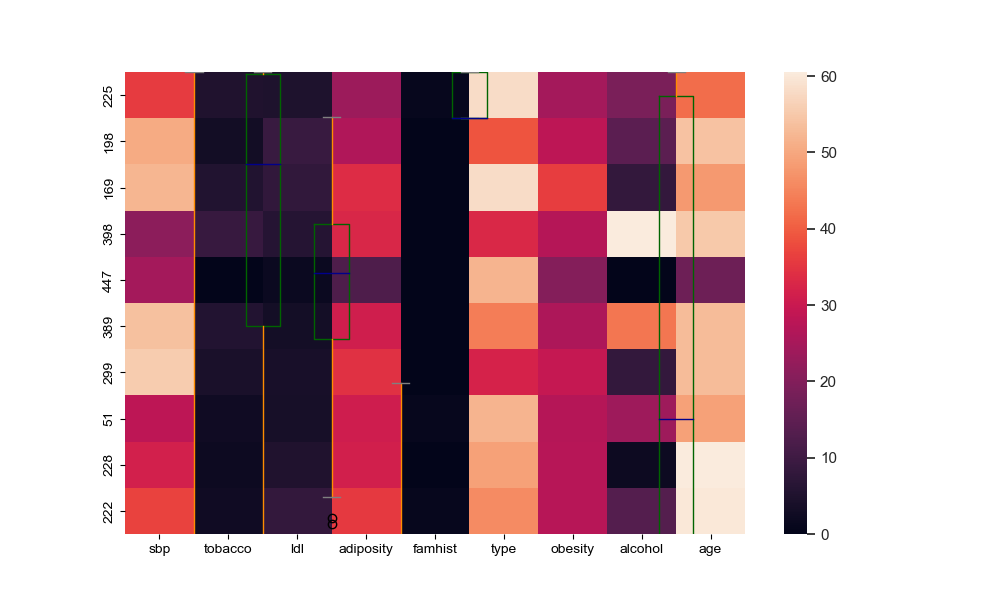

In [20]:
data.plot(kind='box',figsize=(10,6),color=color,ylim=[-10,90]);

## Fractionnement des données

In [21]:
# diviser les données en test et train ayant une taille de test de 20 % et 80 % de taille de train
from sklearn.model_selection import train_test_split
col = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age']
X_train, X_test, y_train, y_test = train_test_split(data[col], data['chd'], test_size=0.2, random_state=1234)

Maintenant, les résultats du modèle dépendent de l'état aléatoire sur lequel nous distribuons les données, car ce sont des données trop petites pour que le modèle comprenne un modèle relatif avec un ensemble de tests donné à l'état aléatoire 42, nous obtenons des résultats comme SVM, ANN et de peur avec KNN à l'état aléatoire 1234, nous obtenons des résultats comme ANN, SVM et moins avec KNN

Pour surmonter ce problème, nous avons également utilisé le pliage en K, pour augmenter la précision, ce qui donne une précision beaucoup plus élevée à mesure que le pli augmente et une petite augmentation de la précision moyenne également.

Heatmap des fonctionnalités réelles.

In [22]:
sns.set()
sns.heatmap(X_train.head(10),robust = True);

In [23]:
X_all = data[col]
y_all = data['chd']

Le prétraitement des données est terminé, la mise en œuvre des modèles

## Modèle de Machine learning
 
Dans cette partie, nous allons tester 3 approches différentes de Machine Learning pour réaliser la prédiction des maladies cardiaques.

### 1. Machine à vecteurs de support (SVM) 

Un Support Vector Machine(SVM) est un classificateur discriminatoire formellement défini par un hyperplan de séparation. En d'autres termes, étant donné des données d'apprentissage étiquetées (apprentissage supervisé), l'algorithme produit un hyperplan optimal qui catégorise de nouveaux exemples.

Noyau utilisé : Linéaire
Degré = 3
Gamma = Auto

In [24]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [25]:
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [26]:
y_pred_svm =svm_clf.predict(X_test)

In [27]:
y_pred_svm

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0], dtype=int64)

In [28]:
# Faire la matrice de confusion
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[51,  9],
       [15, 18]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.7419354838709677


In [30]:
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

(0.85, 0.7391304347826086)

Précision : 0.741 

Rappel : 0.85 

Précision : 0.739

### 2. k Plus proches voisins (kNN)

En reconnaissance de formes, l'algorithme des k plus proches voisins (k-NN) est une méthode non paramétrique utilisée pour la classification et la régression. Dans les deux cas, l'entrée se compose des k exemples d'apprentissage les plus proches dans l'espace des caractéristiques. ... Dans la classification k-NN, la sortie est une appartenance à une classe.

Voisins = 5

N_jobs = Nombre de cœurs ,-1

Taille des feuilles = 60

Algorithme = Brute

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')

In [32]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1)

In [33]:
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0], dtype=int64)

In [34]:
# Faire la matrice de confusion
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[49, 11],
       [22, 11]], dtype=int64)

In [35]:
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.6451612903225806

In [36]:
recall_knn = cm_knn[0][0]/(cm_knn[0][0] + cm_knn[0][1])
precision_knn = cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])
recall_knn,precision_knn

(0.8166666666666667, 0.8166666666666667)

Précision : 0.645

Rappel : 0.816

Précision : 0.816 

La validation croisée récupère de la différence d'état aléatoire en plongeant l'ensemble de données complet en K parties et apprend de manière itérative à partir des données.

Plis = 10

In [37]:
from sklearn.model_selection import KFold

fold_list =[]
accuracy_list =[]
def run_kfold(knn_clf):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(data):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        knn_clf.fit(X_train, y_train)
        predictions = knn_clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
        fold_list.append(fold)
        accuracy_list.append(accuracy)
        mean_outcome = np.mean(outcomes)
        print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(knn_clf)

Fold 1 accuracy: 0.5531914893617021
Mean Accuracy: 0.5531914893617021
Fold 2 accuracy: 0.5957446808510638
Mean Accuracy: 0.574468085106383
Fold 3 accuracy: 0.6956521739130435
Mean Accuracy: 0.6148627813752698
Fold 4 accuracy: 0.5434782608695652
Mean Accuracy: 0.5970166512488437
Fold 5 accuracy: 0.5217391304347826
Mean Accuracy: 0.5819611470860315
Fold 6 accuracy: 0.5434782608695652
Mean Accuracy: 0.5755473327166204
Fold 7 accuracy: 0.6739130434782609
Mean Accuracy: 0.5895995771111405
Fold 8 accuracy: 0.6739130434782609
Mean Accuracy: 0.6001387604070305
Fold 9 accuracy: 0.5652173913043478
Mean Accuracy: 0.5962586082845102
Fold 10 accuracy: 0.717391304347826
Mean Accuracy: 0.6083718778908418


Boîte de parcelle de l'apprentissage itératif par K Fold dans K-Nearest Neighbors

<IPython.core.display.Javascript object>


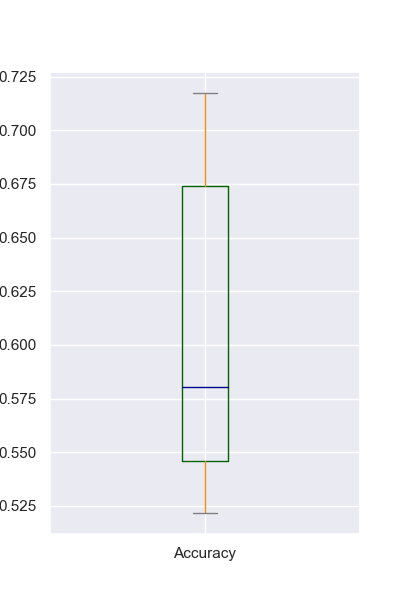

In [48]:
fold_df =pd.DataFrame({'Fold':fold_list,'Accuracy':accuracy_list}).set_index('Fold')
fold_df.plot(kind='box',figsize=(4,6),color=color);

Précision du pli 10 : 0,717391304347826 

Précision moyenne : 0,6083718778908418 

### 3. Réseau de neurones artificiels (ANN) 

Modèle séquentiel

Nœud d'entrée : 9

Couche cachée : 2

Chaque couche contient 6 neurones

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_annk = confusion_matrix(y_test, y_pred)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.6585
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6558
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6558
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6558
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.6558
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6558
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.6558
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.6558
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.6558
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6558
Epoch 11/

In [55]:
cm_annk

array([[52,  8],
       [16, 17]], dtype=int64)

In [56]:
annk_result = 0.7453

In [57]:
recall_annk = cm_annk[0][0]/(cm_annk[0][0] + cm_annk[0][1])
precision_annk = cm_annk[0][0]/(cm_annk[0][0]+cm_annk[1][1])
recall_annk,precision_annk

(0.8666666666666667, 0.7536231884057971)

Précision ~ 0,7453

Rappel : 0.86

Précision : 0.75

### Comparaison des modèles d'apprentissage automatique 

In [58]:
results = {'Accuracy': [svm_result*100,knn_result*100,annk_result*100],
          'Recall': [recall_svm*100,recall_knn*100,recall_annk*100],
          'Precision': [precision_svm*100,precision_knn*100,precision_annk*100]}
index = ['SVM','KNN','ANN']

In [59]:
results = pd.DataFrame(results,index=index)

<IPython.core.display.Javascript object>


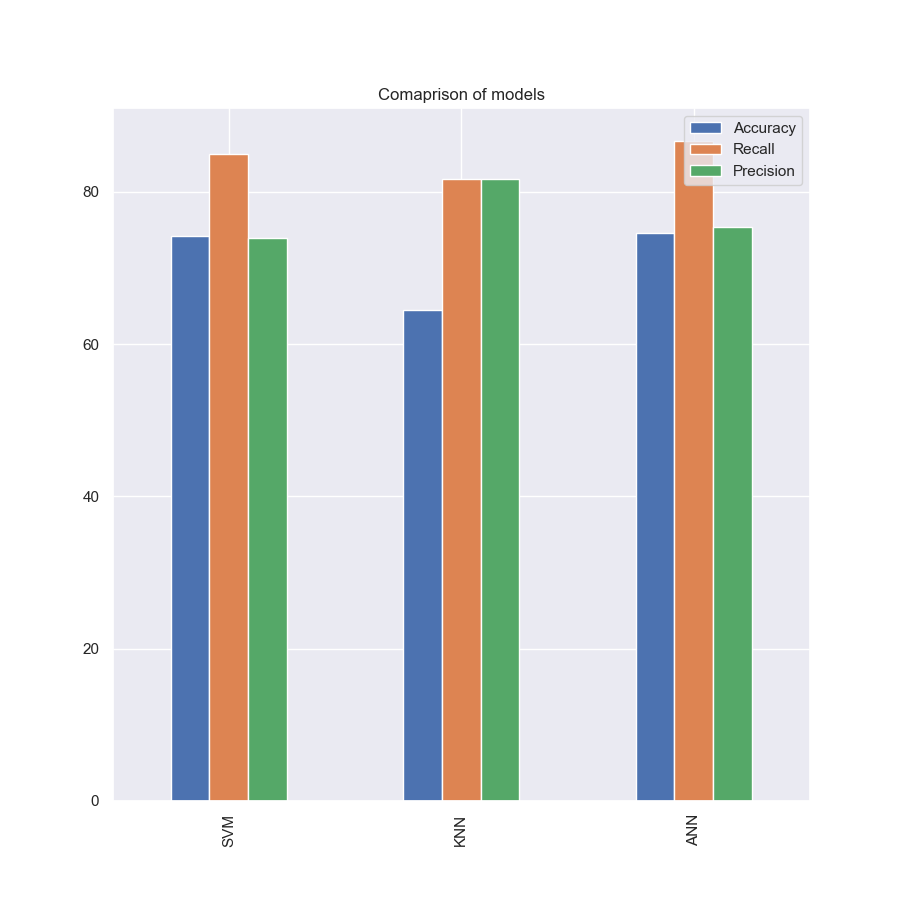

In [60]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(9,9)).get_figure()
fig.savefig('Final Result.png')

<IPython.core.display.Javascript object>


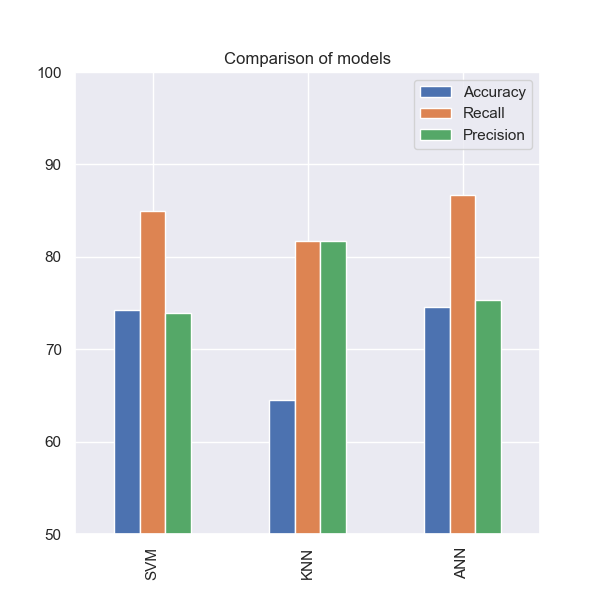

In [61]:
fig =results.plot(kind='bar',title='Comparison of models',figsize =(6,6),ylim=[50,100]).get_figure()
fig.savefig('image.png')

<IPython.core.display.Javascript object>


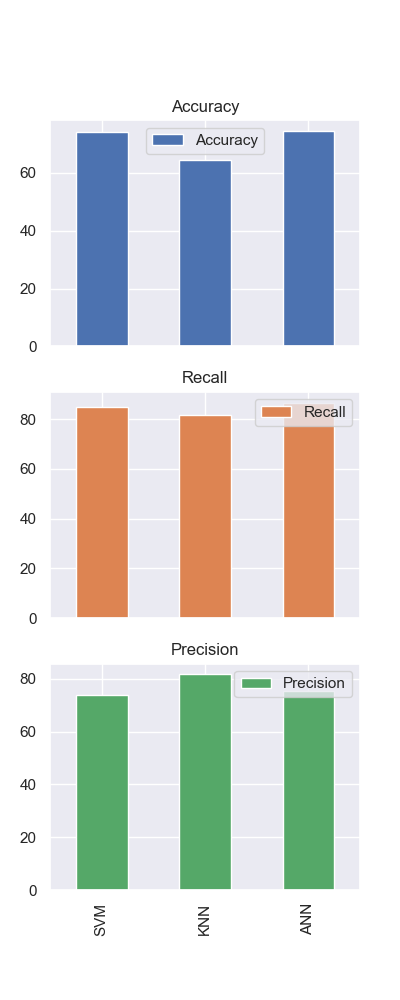

In [62]:
results.plot(subplots=True,kind ='bar',figsize=(4,10));